In [1]:
from ROOT import *
import numpy as np

Welcome to JupyROOT 6.26/00


In [2]:
file = TFile.Open("10000runs6g.root", "READ")
tree = []
for i in range(20):
    a = file.Get("Position"+str(i+1))
    tree.append(a)

hist = []
for i in range(20):
    h = TH1F("number of photons per run "+str(i+1), "", 10000, 0, 10000)
    hist.append(h)

In [3]:
FZX = np.empty((len(tree),), dtype=object)
FY = np.empty((len(tree),), dtype=object)

for i in range(len(tree)):
    AZX = []
    AY = []
    for entry in tree[i]:
        hist[i].Fill(entry.N)
        AZX.append(entry.fZX)
        AY.append(entry.fY)
    FZX[i] = np.array(AZX)
    FY[i] = np.array(AY)

In [276]:
FZXY = []
for i in range(20):
    S = 0 
    fzxy = []
    for j in range(9000,10000):
        C = []
        for k in range(S, S + int(hist[i].GetBinContent(j+1))):
            S = S + 1
            C.append((FZX[i][k], FY[i][k]))
        fzxy.append(C)
    FZXY.append(fzxy)

In [277]:
FZXY_NEW = []
for i in range(20):
    FZXY_new = []
    for j in range(1000):
        FZXY_new.append(list(set(FZXY[i][j])))
    FZXY_NEW.append(FZXY_new)

In [278]:
Z2D = []
X2D = []

In [279]:
for i in range(20):
    if i%2 == 0:
        ZZ = []
        for j in range(1000):
            ZZZ = []
            for k in range(len(FZXY_NEW[i][j])):
                Center_chan = (4*(floor(FZXY_NEW[i][j][k][0]/0.023)+1)-2)*0.00575*10000
                ZZZ.append(Center_chan)
            ZZ.append([[x,ZZZ.count(x)] for x in set(ZZZ)])
        Z2D.append(ZZ)
    else:
        XX = []
        for m in range(1000):
            XXX = []
            for n in range(len(FZXY_NEW[i][m])):
                Center_chan = (4*(floor(FZXY_NEW[i][m][n][0]/0.023)+1)-2)*0.00575*10000
                XXX.append(Center_chan)
            XX.append([[z,XXX.count(z)] for z in set(XXX)])
        X2D.append(XX)

In [280]:
b = []
for i in range(1000):
    for j in range(len(Z2D[9][i])):
        b.append(Z2D[9][i][j][0])
print(max(b))

30705.0


In [281]:
for r in range(1000):
    for i in range(10):
        for j in range(len(Z2D[i][r])):
            chan_num = 225-round((30705.0+230*9-Z2D[i][r][j][0])/230 + 1)
            Z2D[i][r][j][0] = chan_num

In [282]:
for r in range(1000):
    for i in range(10):
        for j in range(len(Z2D[i][r])):
            Z2D[i][r].sort()

In [283]:
Z2D[7][481]

[[185, 2], [186, 19], [187, 10], [188, 17], [189, 6]]

In [284]:
Z9 = []
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[9][i])):
        if Z2D[9][i][j][0] >= 211 and Z2D[9][i][j][0] <= 216:
            Mean = Mean + Z2D[9][i][j][0]*Z2D[9][i][j][1]
            Sig = Sig + Z2D[9][i][j][1]
    if Sig != 0:
        Z9.append(Mean/Sig)
    else:
        Z9.append(0)

In [285]:
Z8 = []
l=8
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 198 and Z2D[l][i][j][0] <= 201:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z8.append(Mean/Sig)
    else:
        Z8.append(0)

In [286]:
Z7 = []
l=7
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 185 and Z2D[l][i][j][0] <= 188:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z7.append(Mean/Sig)
    else:
        Z7.append(0)

In [287]:
Z6 = []
l=6
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 170 and Z2D[l][i][j][0] <= 175:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z6.append(Mean/Sig)
    else:
        Z6.append(0)

Z5 = []
l=5
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 157 and Z2D[l][i][j][0] <= 161:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z5.append(Mean/Sig)
    else:
        Z5.append(0)

Z4 = []
l=4
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 144 and Z2D[l][i][j][0] <= 148:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z4.append(Mean/Sig)
    else:
        Z4.append(0)

Z3 = []
l=3
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 131 and Z2D[l][i][j][0] <= 135:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z3.append(Mean/Sig)
    else:
        Z3.append(0)

Z2 = []
l=2
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 117 and Z2D[l][i][j][0] <= 122:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z2.append(Mean/Sig)
    else:
        Z2.append(0)

Z1 = []
l=1
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 104 and Z2D[l][i][j][0] <= 108:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z1.append(Mean/Sig)
    else:
        Z1.append(0)

Z0 = []
l=0
for i in range(1000):
    Mean = 0
    Sig = 0
    for j in range(len(Z2D[l][i])):
        if Z2D[l][i][j][0] >= 91 and Z2D[l][i][j][0] <= 95:
            Mean = Mean + Z2D[l][i][j][0]*Z2D[l][i][j][1]
            Sig = Sig + Z2D[l][i][j][1]
    if Sig != 0:
        Z0.append(Mean/Sig)
    else:
        Z0.append(0)

In [288]:
Y = []
delZ = 5
for i in range(10):
    Y.append(-39.4375+(i)*delZ)

In [289]:
LAYERS = []
for i in range(1000):
    L = [[Z0[i], Y[0]], [Z1[i], Y[1]], [Z2[i], Y[2]], [Z3[i], Y[3]], [Z4[i], Y[4]], [Z5[i], Y[5]], [Z6[i], Y[6]], [Z7[i], Y[7]], [Z8[i], Y[8]], [Z9[i], Y[9]]]
    LAYERS.append(L)

In [290]:
YMEAN = []
ZMEAN = []
for i in range(1000):
    ZM = 0.
    YM = 0.
    NN = 0
    for j in range(10):
        if LAYERS[i][j][0] != 0:
            ZM = ZM + LAYERS[i][j][0]
            YM = YM + LAYERS[i][j][1]
            NN = NN + 1
    YMEAN.append(YM/NN)
    ZMEAN.append(ZM/NN)

In [291]:
import math

In [292]:
angles = []
k = []
for i in range(1000):
    denom = 0
    numer = 0
    zm = (30705.0+230*9 - 230*(225-ZMEAN[i]))/1000
    ym = YMEAN[i]
    for j in range(10):
        if LAYERS[i][j][0] != 0:
            zi = (30705.0+230*9 - 230*(225-LAYERS[i][j][0]))/1000
            yi = LAYERS[i][j][1]
            numer = numer + (zi - zm)*(yi - ym)
            denom = denom + (zi - zm)*(zi - zm)
    angles.append((180/math.pi)*math.atan(numer/denom))
    k.append(numer/denom)

In [293]:
angles[0]

58.52746759394996

In [294]:
cc = TCanvas()
hang = TH1F("hang", "", 100, 58, 59)
for i in range(1000):
    hang.Fill(angles[i])
hang.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hang (Potential memory leak).


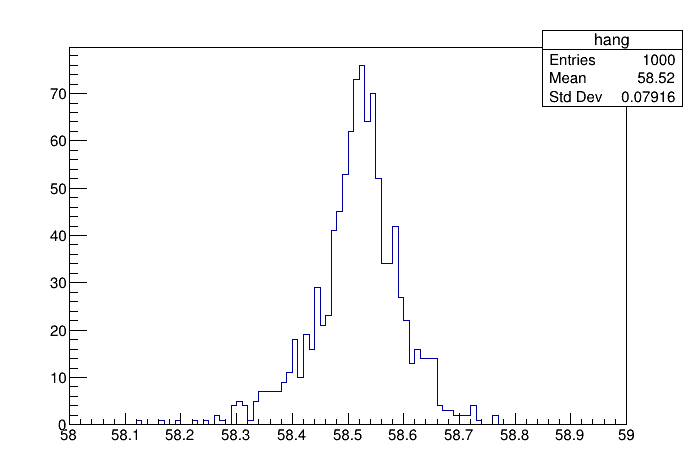

In [295]:
cc.Draw()

In [296]:
myFile = TFile.Open("histo1e4new.root", "UPDATE")
myFile.WriteObject(hang, "hang10")

743

In [297]:
myFile.Close()

In [298]:
myFile = TFile.Open("histo1e4new.root", "READ")

In [299]:
myFile.ls()

TFile**		histo1e4new.root	
 TFile*		histo1e4new.root	
  KEY: TH1F	hang1;1	object title
  KEY: TH1F	hang2;1	object title
  KEY: TH1F	hang3;1	object title
  KEY: TH1F	hang4;1	object title
  KEY: TH1F	hang5;1	object title
  KEY: TH1F	hang6;1	object title
  KEY: TH1F	hang7;1	object title
  KEY: TH1F	hang8;1	object title
  KEY: TH1F	hang9;1	object title
  KEY: TH1F	hang10;1	object title


In [300]:
ccom = TCanvas()
han1 = myFile.hang1
han2 = myFile.hang2
han3 = myFile.hang3
han4 = myFile.hang4
han5 = myFile.hang5
han6 = myFile.hang6
han7 = myFile.hang7
han8 = myFile.hang8
han9 = myFile.hang9
han10 = myFile.hang10
hanCom = han1+han2+han3+han4+han5+han6+han7+han8+han9+han10
hanCom.Draw()

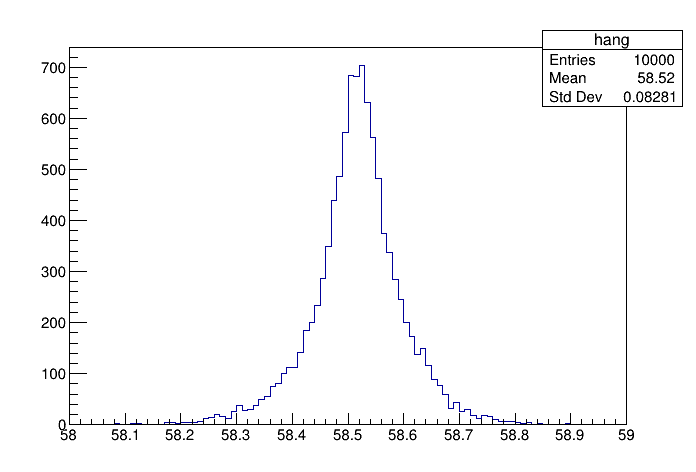

In [302]:
#f = TF1("f", "gaus", 20.54, 20.63)
#hanCom.Fit("f", "R")
ccom.Draw()

In [303]:
ccom.SaveAs("k10.C")

Info in <TCanvas::SaveSource>: C++ Macro file: k10.C has been generated


In [442]:
print(f.GetParameter(2) * 2.336, f.GetParError(2) * 2.336)

0.07893163940162963 0.0021508747531529004


In [443]:
print(f.GetChisquare(), f.GetNDF())

11.120486623017559 6


In [209]:
layers = []
for i in range(1000):
    l = []
    for j in range(10):
        l.append(list([Z2D[j*1000+i], Y[j]]))
    layers.append(l)

In [210]:
Z_mean = []
for i in range(1000):
    zmean = 0
    for j in range(10):
        zmean = zmean + layers[i][j][0]
    Z_mean.append(zmean/10)

In [211]:
ymean = 0
for i in range(10):
    ymean = ymean + Y[i]
ymean = ymean/10

In [212]:
import math

In [213]:
angles = []
k = []
for i in range(1000):
    denom = 0
    numer = 0
    for j in range(10):
        numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - ymean)
        denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
    angles.append((180/math.pi)*math.atan(numer/denom))
    k.append(numer/denom)

In [214]:
b = []
for i in range(1000):
    Y = 0 
    X = 0
    for j in range(10):
        Y = Y + layers[i][j][1]
        X = X + layers[i][j][0]
    b.append((Y-k[i]*X/1000)/10)

chi = []
for i in range(1000):
    c = 0
    for j in range(10):
        c = c + (layers[i][j][1] - k[i]*layers[i][j][0]/1000 - b[i])**2
    chi.append(c)

AA1 = []
I1 = []
for i in range(1000):
    if chi[i] > 0.1:
        A = []
        for j in range(10):
            c = (layers[i][j][1] - k[i]*layers[i][j][0]/1000 -b[i])**2
            A.append(c)
        AA1.append([i,A])
        I1.append(i)

In [215]:
Y = []
delZ = 5
for i in range(10):
    Y.append(-39.4375+(i)*delZ)

In [216]:
Z_mean = []
for i in range(1000):
    zmean = 0
    if i not in I1:
        for j in range(10):
            zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/10)
    else:
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/9)

Y_mean = []
for i in range(1000):
    ymean = 0
    if i not in I1:
        for j in range(10):
            ymean = ymean + Y[j]
        Y_mean.append(ymean/10)
    else:
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/9)

In [217]:
angles2 = []
k1 = []
s = 0
for i in range(1000):
    if i not in I1:
        denom = 0
        numer = 0
        for j in range(10):
            numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
            denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles2.append((180/math.pi)*math.atan(numer/denom))
    else:
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA1[s][1].index(max(AA1[s][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles2.append((180/math.pi)*math.atan(numer/denom))
        k1.append(numer/denom)
        s = s + 1

In [218]:
b1 = []
ss = 0
for i in range(len(I1)):
    Y = 0 
    X = 0
    for j in range(10):
        if j != AA1[ss][1].index(max(AA1[ss][1])):
            Y = Y + layers[I1[i]][j][1]
            X = X + layers[I1[i]][j][0] #NOT i 
    b1.append((Y-k1[i]*X/1000)/9)
    ss = ss + 1

chi1 = []
sss = 0
for i in range(len(I1)):
    c = 0
    for j in range(10):
        if j != AA1[sss][1].index(max(AA1[sss][1])):
            c = c + (layers[I1[i]][j][1] - k1[i]*layers[I1[i]][j][0]/1000 - b1[i])**2
    chi1.append(c)
    sss = sss + 1

AA2 = []
I2 = []
for i in range(len(chi1)):
    if chi1[i] > 0.09:
        A = []
        for j in range(10):
            if j == AA1[i][1].index(max(AA1[i][1])):
                A.append(0)
            else:
                c = (layers[I1[i]][j][1] - k1[i]*layers[I1[i]][j][0]/1000 - b1[i])**2
                A.append(c)
        AA2.append([I1[i],A])
        I2.append(I1[i])

In [219]:
Y = []
delZ = 5
for i in range(10):
    Y.append(-39.4375+(i)*delZ)

In [220]:
Z_mean = []
for i in range(1000):
    zmean = 0
    if i not in I1:
        for j in range(10):
            zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/10)
    elif i in set(I1)-set(I2):
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/9)
    else:
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                zmean = zmean + layers[i][j][0]
        Z_mean.append(zmean/8)

Y_mean = []
for i in range(1000):
    ymean = 0
    if i not in I1:
        for j in range(10):
            ymean = ymean + Y[j]
        Y_mean.append(ymean/10)
    elif i in set(I1)-set(I2):
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/9)
    else:
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                ymean = ymean + Y[j]
        Y_mean.append(ymean/8)

In [221]:
angles3 = []
k2 = []
for i in range(1000):
    if i not in I1:
        denom = 0
        numer = 0
        for j in range(10):
            numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
            denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
    elif i in set(I1)-set(I2):
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA1[I1.index(i)][1].index(max(AA1[I1.index(i)][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
    else:
        denom = 0
        numer = 0
        for j in range(10):
            if j != AA2[I2.index(i)][1].index(0) and j != AA2[I2.index(i)][1].index(max(AA2[I2.index(i)][1])):
                numer = numer + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][1] - Y_mean[i])
                denom = denom + (layers[i][j][0]/1000 - Z_mean[i]/1000)*(layers[i][j][0]/1000 - Z_mean[i]/1000)
        angles3.append((180/math.pi)*math.atan(numer/denom))
        k2.append(numer/denom)

In [222]:
can = TCanvas()
hangles = TH1F("han", "", 100, 58, 59)
hangles2 = TH1F("han2", "", 100, 58, 59)
hangles3 = TH1F("han3", "", 100, 58, 59)

for i in range(1000):
    hangles.Fill(angles[i])
    hangles2.Fill(angles2[i])
    hangles3.Fill(angles3[i])

gStyle.SetOptStat(0)
hangles.GetXaxis().SetTitle("incident angle #theta, deg")
hangles.GetXaxis().CenterTitle(True)
hangles.GetXaxis().SetTitleFont(132)
hangles.GetXaxis().SetTitleSize(0.05)
hangles.GetXaxis().SetLabelFont(132)
hangles.GetYaxis().SetLabelFont(132)
hangles.GetXaxis().SetLabelSize(0.05)
hangles.GetYaxis().SetLabelSize(0.05)
hangles.SetLineWidth(2)
hangles.SetLineColor(8)
hangles.SetFillColor(8)
hangles.GetYaxis().SetRangeUser(0, 100)
hangles.Draw()

hangles2.GetXaxis().CenterTitle(True)
hangles2.GetXaxis().SetTitleFont(132)
hangles2.GetXaxis().SetTitleSize(0.05)
hangles2.GetXaxis().SetLabelFont(132)
hangles2.GetYaxis().SetLabelFont(132)
hangles2.GetXaxis().SetLabelSize(0.05)
hangles2.GetYaxis().SetLabelSize(0.05)
hangles2.SetLineWidth(2)
hangles2.SetLineColor(kRed)
hangles2.SetFillColorAlpha(kRed, 0.35)
hangles2.Draw("SAME")

hangles3.GetXaxis().CenterTitle(True)
hangles3.GetXaxis().SetTitleFont(132)
hangles3.GetXaxis().SetTitleSize(0.05)
hangles3.GetXaxis().SetLabelFont(132)
hangles3.GetYaxis().SetLabelFont(132)
hangles3.GetXaxis().SetLabelSize(0.05)
hangles3.GetYaxis().SetLabelSize(0.05)
hangles3.SetLineWidth(2)
hangles3.SetLineColor(kBlue)
hangles3.SetFillColorAlpha(kBlue, 0.2)
hangles3.Draw("SAME")

 FCN=5.75795 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=3.23434e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.39359e+01   3.98527e+00   3.73035e-03  -1.29739e-04
   2  Mean         5.84494e+01   2.04639e-03   2.78709e-05  -1.22779e-02
   3  Sigma        3.89261e-02   2.47786e-03   2.32165e-05  -4.26054e-02


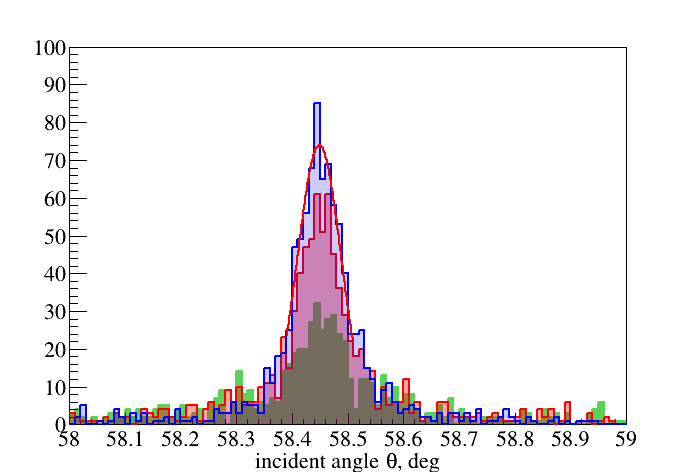

In [223]:
f = TF1("f", "gaus", 58.39, 58.51)
hangles3.Fit("f", "R")
can.Draw()

In [224]:
print(f.GetParameter(2) * 2.336, f.GetParError(2) * 2.336)

0.09093145563791369 0.005788277645300574


In [225]:
print(f.GetChisquare(), f.GetNDF())

5.75795448741758 9


In [254]:
myFile = TFile.Open("histo1e4.root", "UPDATE")
myFile.WriteObject(hangles3_1, "hangles3_10")
myFile.WriteObject(hangles2_1, "hangles2_10")
myFile.WriteObject(hangles_1, "hangles_10")

436

In [255]:
myFile.Close()

In [256]:
myFile = TFile.Open("histo1e4.root", "READ")

In [257]:
myFile.ls()

TFile**		histo1e4.root	
 TFile*		histo1e4.root	
  KEY: TH1F	hangles3_1;1	object title
  KEY: TH1F	hangles2_1;1	object title
  KEY: TH1F	hangles_1;1	object title
  KEY: TH1F	hangles3_2;1	object title
  KEY: TH1F	hangles2_2;1	object title
  KEY: TH1F	hangles_2;1	object title
  KEY: TH1F	hangles3_3;1	object title
  KEY: TH1F	hangles2_3;1	object title
  KEY: TH1F	hangles_3;1	object title
  KEY: TH1F	hangles3_4;1	object title
  KEY: TH1F	hangles2_4;1	object title
  KEY: TH1F	hangles_4;1	object title
  KEY: TH1F	hangles3_5;1	object title
  KEY: TH1F	hangles2_5;1	object title
  KEY: TH1F	hangles_5;1	object title
  KEY: TH1F	hangles3_6;1	object title
  KEY: TH1F	hangles2_6;1	object title
  KEY: TH1F	hangles_6;1	object title
  KEY: TH1F	hangles3_7;1	object title
  KEY: TH1F	hangles2_7;1	object title
  KEY: TH1F	hangles_7;1	object title
  KEY: TH1F	hangles3_8;1	object title
  KEY: TH1F	hangles2_8;1	object title
  KEY: TH1F	hangles_8;1	object title
  KEY: TH1F	hangles3_9;1	object title
  KEY: TH1

 FCN=8.82525 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=8.72349e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.50787e+02   1.29248e+01   1.41505e-02  -7.70034e-05
   2  Mean         5.85022e+01   6.87848e-04   2.78960e-05  -3.10579e-01
   3  Sigma        4.07808e-02   9.15855e-04   9.75491e-06   4.56871e-02


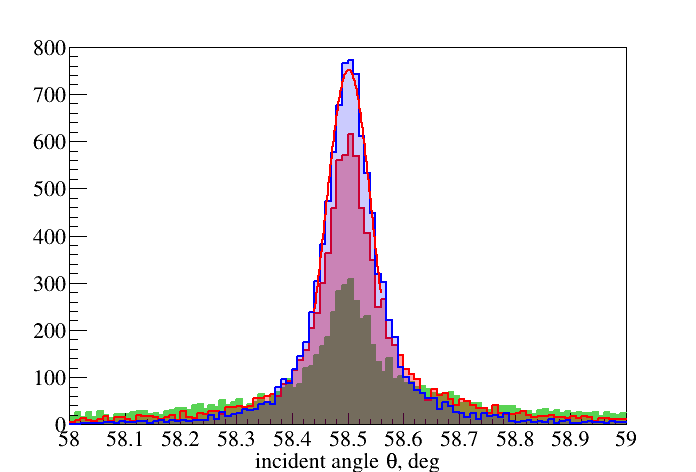

In [273]:
cc = TCanvas()
hangles3_10 = myFile.hangles3_10
hangles3_9  = myFile.hangles3_9
hangles3_8  = myFile.hangles3_8
hangles3_7  = myFile.hangles3_7
hangles3_6  = myFile.hangles3_6
hangles3_5  = myFile.hangles3_5
hangles3_4  = myFile.hangles3_4
hangles3_3  = myFile.hangles3_3
hangles3_2  = myFile.hangles3_2
hangles3_1  = myFile.hangles3_1

hangles2_10 = myFile.hangles2_10
hangles2_9  = myFile.hangles2_9
hangles2_8  = myFile.hangles2_8
hangles2_7  = myFile.hangles2_7
hangles2_6  = myFile.hangles2_6
hangles2_5  = myFile.hangles2_5
hangles2_4  = myFile.hangles2_4
hangles2_3  = myFile.hangles2_3
hangles2_2  = myFile.hangles2_2
hangles2_1  = myFile.hangles2_1

hangles_10 = myFile.hangles_10
hangles_9  = myFile.hangles_9
hangles_8  = myFile.hangles_8
hangles_7  = myFile.hangles_7
hangles_6  = myFile.hangles_6
hangles_5  = myFile.hangles_5
hangles_4  = myFile.hangles_4
hangles_3  = myFile.hangles_3
hangles_2  = myFile.hangles_2
hangles_1  = myFile.hangles_1
han3=hangles3_9+hangles3_10+hangles3_8+hangles3_7+hangles3_6+hangles3_5+hangles3_4+hangles3_3+hangles3_2+hangles3_1
han2=hangles2_9+hangles2_10+hangles2_8+hangles2_7+hangles2_6+hangles2_5+hangles2_4+hangles2_3+hangles2_2+hangles2_1
han =hangles_9+hangles_10+hangles_8+hangles_7+hangles_6+hangles_5+hangles_4+hangles_3+hangles_2+hangles_1

gStyle.SetOptStat(0)
han.GetXaxis().SetTitle("incident angle #theta, deg")
han.GetXaxis().CenterTitle(True)
han.GetXaxis().SetTitleFont(132)
han.GetXaxis().SetTitleSize(0.05)
han.GetXaxis().SetLabelFont(132)
han.GetYaxis().SetLabelFont(132)
han.GetXaxis().SetLabelSize(0.05)
han.GetYaxis().SetLabelSize(0.05)
han.SetLineWidth(2)
han.SetLineColor(8)
han.SetFillColor(8)
han.GetYaxis().SetRangeUser(0, 800)
han.Draw()

han2.GetXaxis().CenterTitle(True)
han2.GetXaxis().SetTitleFont(132)
han2.GetXaxis().SetTitleSize(0.05)
han2.GetXaxis().SetLabelFont(132)
han2.GetYaxis().SetLabelFont(132)
han2.GetXaxis().SetLabelSize(0.05)
han2.GetYaxis().SetLabelSize(0.05)
han2.SetLineWidth(2)
han2.SetLineColor(kRed)
han2.SetFillColorAlpha(kRed, 0.35)
han2.Draw("SAME")

han3.GetXaxis().CenterTitle(True)
han3.GetXaxis().SetTitleFont(132)
han3.GetXaxis().SetTitleSize(0.05)
han3.GetXaxis().SetLabelFont(132)
han3.GetYaxis().SetLabelFont(132)
han3.GetXaxis().SetLabelSize(0.05)
han3.GetYaxis().SetLabelSize(0.05)
han3.SetLineWidth(2)
han3.SetLineColor(kBlue)
han3.SetFillColorAlpha(kBlue, 0.2)
han3.Draw("SAME")

f = TF1("f", "gaus", 58.44, 58.56)
han3.Fit("f", "R")
cc.Draw()

In [274]:
cc.SaveAs("runs1e4G6.C")

Info in <TCanvas::SaveSource>: C++ Macro file: runs1e4G6.C has been generated


In [268]:
f.GetChisquare()

8.825248207015129

In [269]:
f.GetNDF()

9

In [270]:
9.15855e-04*2.336

0.00213943728

In [267]:
4.07808e-02*2.336

0.0952639488

In [264]:
a = []
for i in range(100):
    a.append(han3.GetBinContent(i+1))
s = 0
for i in range(100):
    if han3.GetBinContent(i+1) > max(a)/2:
        s = s + han3.GetBinContent(i+1)
        print(i+1, han3.GetBinContent(i+1))
print(s)

47 474.0
48 577.0
49 677.0
50 765.0
51 771.0
52 743.0
53 610.0
54 533.0
55 448.0
5598.0
